In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../../')
from copy import deepcopy
import datetime
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer,
    run_trainers
)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Read Data

In [2]:
original_features_df = pd.read_csv("../../../../../data/credit_rating/intermediate_data/transformed_semi_annual_credit_rating_features.csv")

In [3]:
dt_model = DecisionTreeClassifier()
trainer_whole = RatingModelTrainer(original_features_df, dt_model, output_type='is_investment_grade', dev_type='whole')
trainer_delta = RatingModelTrainer(original_features_df, dt_model, output_type='is_investment_grade', dev_type='delta')
trainer_mixed = RatingModelTrainer(original_features_df, dt_model, output_type='is_investment_grade', dev_type='mixed')

******************************entire test set - whole model******************************


/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Precision,Recall,F1 Score
micro,0.7496,0.7496,0.7496
macro,0.7628,0.7552,0.7486
weighted,0.7668,0.7496,0.7478


Detailed classification report:
             precision    recall  f1-score   support

      False       0.84      0.65      0.73     11585
       True       0.69      0.86      0.76     10393

avg / total       0.77      0.75      0.75     21978

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,8920,1473
False,4030,7555


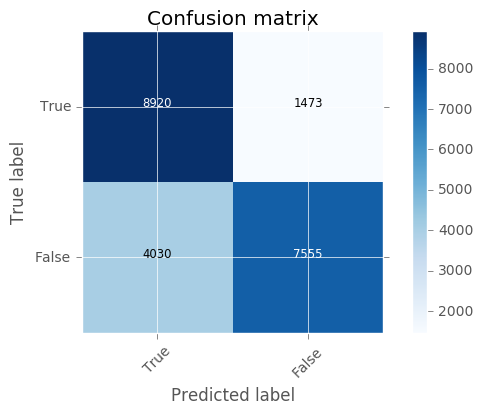

******************************entire test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.5465,0.5465,0.5465
macro,0.5490,0.5488,0.5464
weighted,0.5507,0.5465,0.5460


Detailed classification report:
             precision    recall  f1-score   support

      False       0.58      0.51      0.54     11585
       True       0.52      0.59      0.55     10393

avg / total       0.55      0.55      0.55     21978

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,6159,4234
False,5734,5851


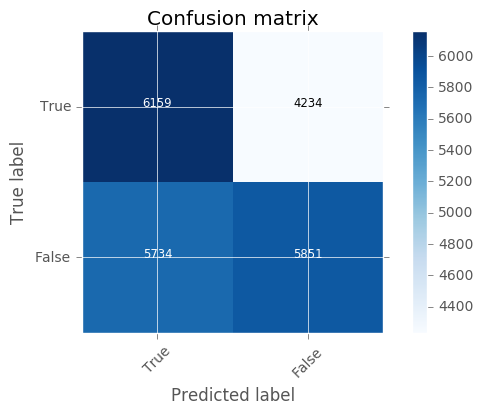

******************************entire test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.6560,0.6560,0.6560
macro,0.6640,0.6606,0.6552
weighted,0.6668,0.6560,0.6543


Detailed classification report:
             precision    recall  f1-score   support

      False       0.72      0.58      0.64     11585
       True       0.61      0.75      0.67     10393

avg / total       0.67      0.66      0.65     21978

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,7750,2643
False,4917,6668


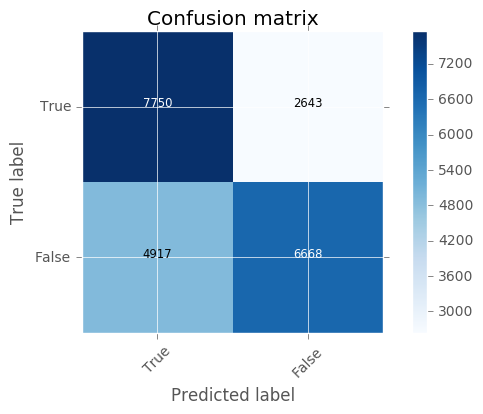

******************************delta test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.0253,0.0253,0.0253
macro,0.0261,0.0372,0.0252
weighted,0.0268,0.0253,0.0207


Detailed classification report:
             precision    recall  f1-score   support

      False       0.03      0.01      0.02      4072
       True       0.02      0.06      0.04      1574

avg / total       0.03      0.03      0.02      5646

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,101,1473
False,4030,42


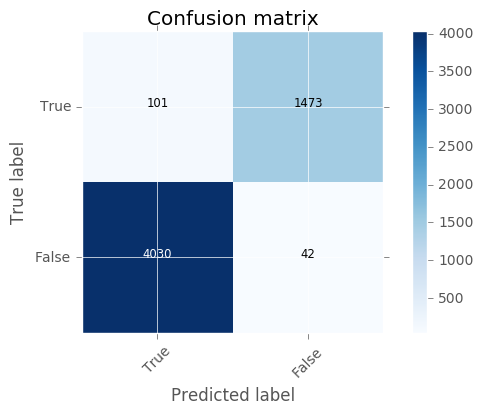

******************************delta test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.0155,0.0155,0.0155
macro,0.0159,0.0158,0.0155
weighted,0.0163,0.0155,0.0156


Detailed classification report:
             precision    recall  f1-score   support

      False       0.02      0.01      0.02      5815
       True       0.01      0.02      0.02      4310

avg / total       0.02      0.02      0.02     10125

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,76,4234
False,5734,81


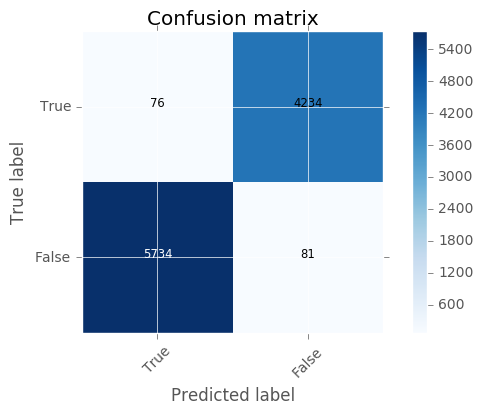

******************************delta test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.0196,0.0196,0.0196
macro,0.0203,0.0225,0.0196
weighted,0.0211,0.0196,0.0186


Detailed classification report:
             precision    recall  f1-score   support

      False       0.02      0.01      0.02      4979
       True       0.02      0.03      0.02      2732

avg / total       0.02      0.02      0.02      7711

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,89,2643
False,4917,62


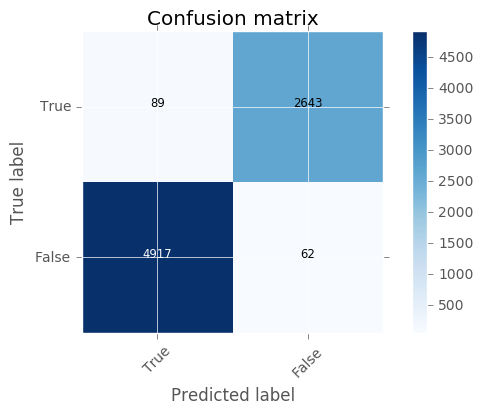

In [4]:
run_trainers([trainer_whole, trainer_delta, trainer_mixed], ["whole", "delta", "mixed"])

In [5]:
dt_model_balanced = DecisionTreeClassifier(class_weight='balanced')
trainer_whole_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='is_investment_grade', dev_type='whole')
trainer_delta_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='is_investment_grade', dev_type='delta')
trainer_mixed_balanced = RatingModelTrainer(original_features_df, dt_model_balanced, output_type='is_investment_grade', dev_type='mixed')

******************************entire test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.7486,0.7486,0.7486
macro,0.7628,0.7544,0.7475
weighted,0.7670,0.7486,0.7465


Detailed classification report:
             precision    recall  f1-score   support

      False       0.84      0.65      0.73     11585
       True       0.69      0.86      0.76     10393

avg / total       0.77      0.75      0.75     21978

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,8956,1437
False,4089,7496


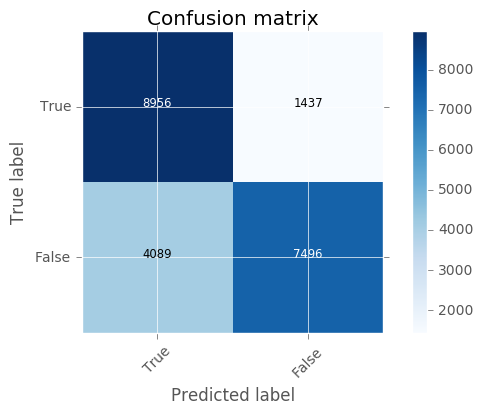

******************************entire test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.5353,0.5353,0.5353
macro,0.5353,0.5354,0.5349
weighted,0.5367,0.5353,0.5356


Detailed classification report:
             precision    recall  f1-score   support

      False       0.56      0.53      0.55     11585
       True       0.51      0.54      0.52     10393

avg / total       0.54      0.54      0.54     21978

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,5582,4811
False,5403,6182


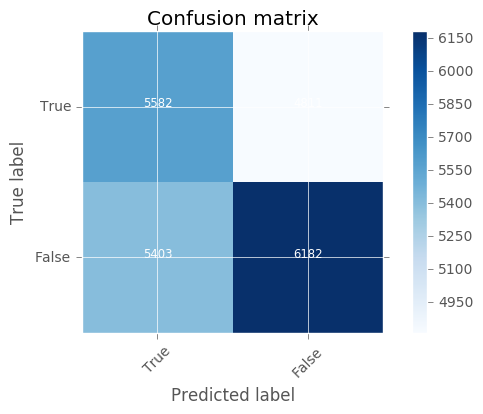

******************************entire test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.6627,0.6627,0.6627
macro,0.6693,0.6668,0.6621
weighted,0.6720,0.6627,0.6614


Detailed classification report:
             precision    recall  f1-score   support

      False       0.72      0.59      0.65     11585
       True       0.62      0.74      0.68     10393

avg / total       0.67      0.66      0.66     21978

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,7720,2673
False,4741,6844


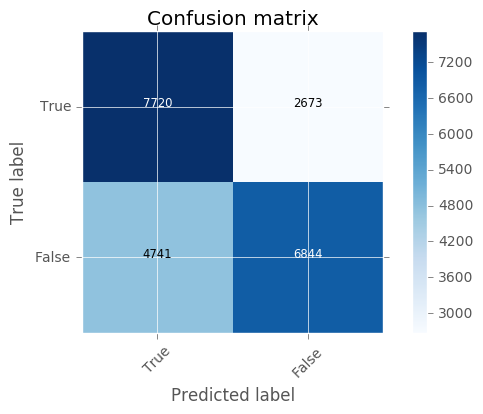

******************************delta test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.0235,0.0235,0.0235
macro,0.0236,0.0362,0.0234
weighted,0.0237,0.0235,0.0184


Detailed classification report:
             precision    recall  f1-score   support

      False       0.02      0.01      0.01      4124
       True       0.02      0.06      0.03      1535

avg / total       0.02      0.02      0.02      5659

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,98,1437
False,4089,35


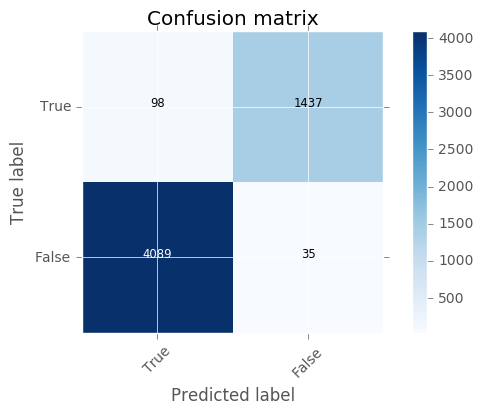

******************************delta test set - delta model******************************


,Precision,Recall,F1 Score
micro,0.0150,0.015,0.0150
macro,0.0152,0.015,0.0150
weighted,0.0154,0.015,0.0152


Detailed classification report:
             precision    recall  f1-score   support

      False       0.02      0.02      0.02      5493
       True       0.01      0.01      0.01      4877

avg / total       0.02      0.02      0.02     10370

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,66,4811
False,5403,90


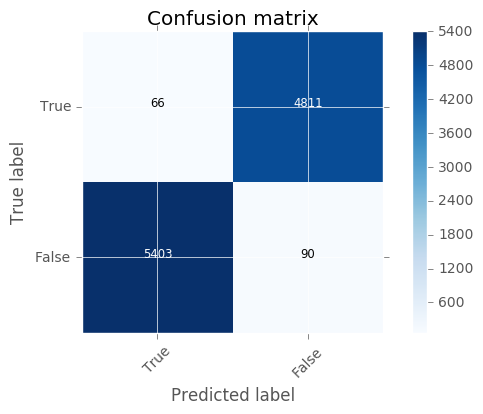

******************************delta test set - mixed model******************************


,Precision,Recall,F1 Score
micro,0.0203,0.0203,0.0203
macro,0.0209,0.0230,0.0203
weighted,0.0215,0.0203,0.0194


Detailed classification report:
             precision    recall  f1-score   support

      False       0.02      0.01      0.02      4804
       True       0.02      0.03      0.02      2764

avg / total       0.02      0.02      0.02      7568

Confusion Matrix:
Confusion matrix, without normalization


,True,False
True,91,2673
False,4741,63


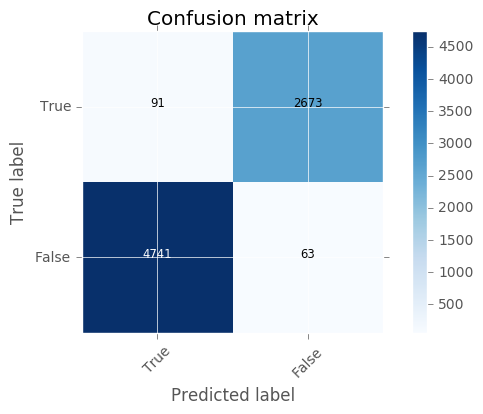

In [6]:
run_trainers([trainer_whole_balanced, trainer_delta_balanced, trainer_mixed_balanced], ["whole", "delta", "mixed"])